In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/iris.csv")

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-v0_8-notebook')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(len(df))


150


In [ ]:
null_values = df.isnull()

null_counts = df.isnull().sum()
print(null_counts)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(df.isnull)

<bound method DataFrame.isnull of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
value_counts_Species = df['Species'].value_counts()
print(value_counts_Species)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
clustering_data = df.iloc[:, :-1]

In [ ]:
print(clustering_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [ ]:
new_spe_df = df.iloc[:, [-1]]

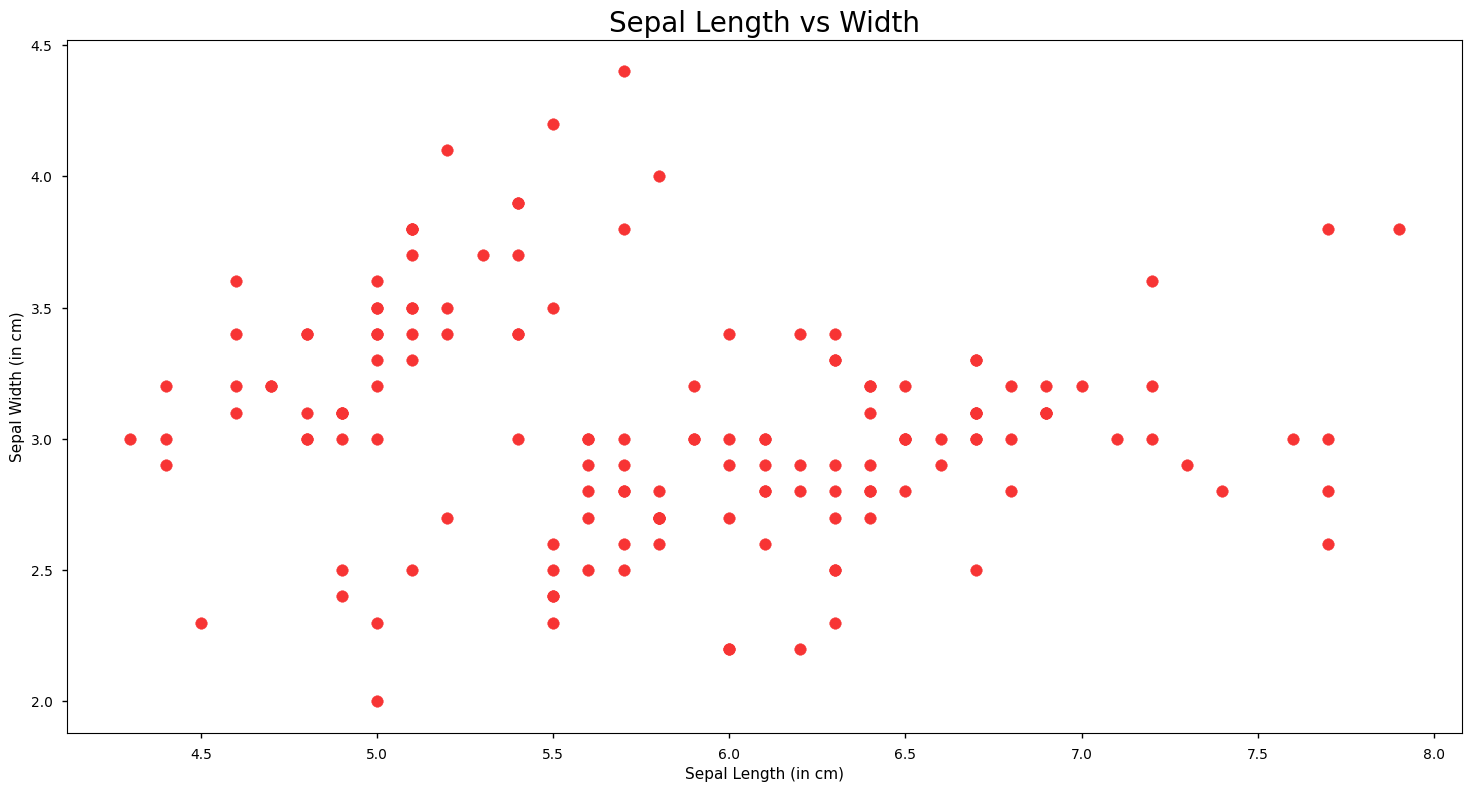

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=clustering_data['SepalLengthCm'],
                    y=clustering_data['SepalWidthCm'],
                    s=70,
                    color='#f73434',
                    edgecolor='#f73434',
                    linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize=20)
plt.show()

In [ ]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(clustering_data)
  wcss.append(km.inertia_)
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.34540932,
        46.56163016,  38.93096305,  34.47178333,  29.91315099,
        27.99339079,  26.40623554])

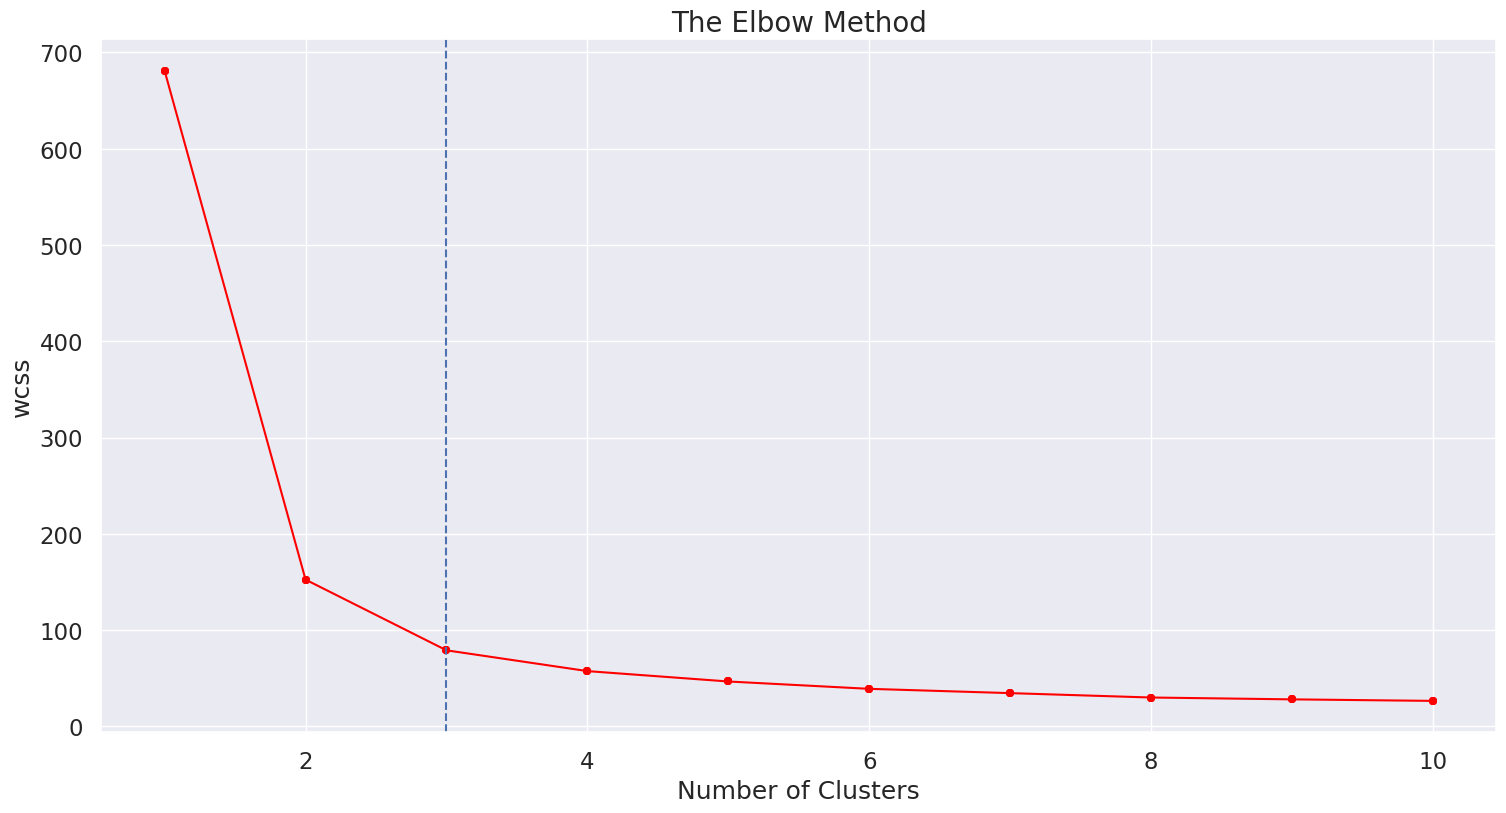

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax = plt.plot(range(1, 11),
              wcss,
              color='red',
              marker='8')
plt.axvline(x=3, ls='--')
plt.ylabel('wcss')
plt.xlabel('Number of Clusters')
plt.title('The Elbow Method', fontsize=20)
plt.show()

In [ ]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=3)

In [ ]:
clusters = clustering_data.copy()
clusters['cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_Prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
kms.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [ ]:
clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_Prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


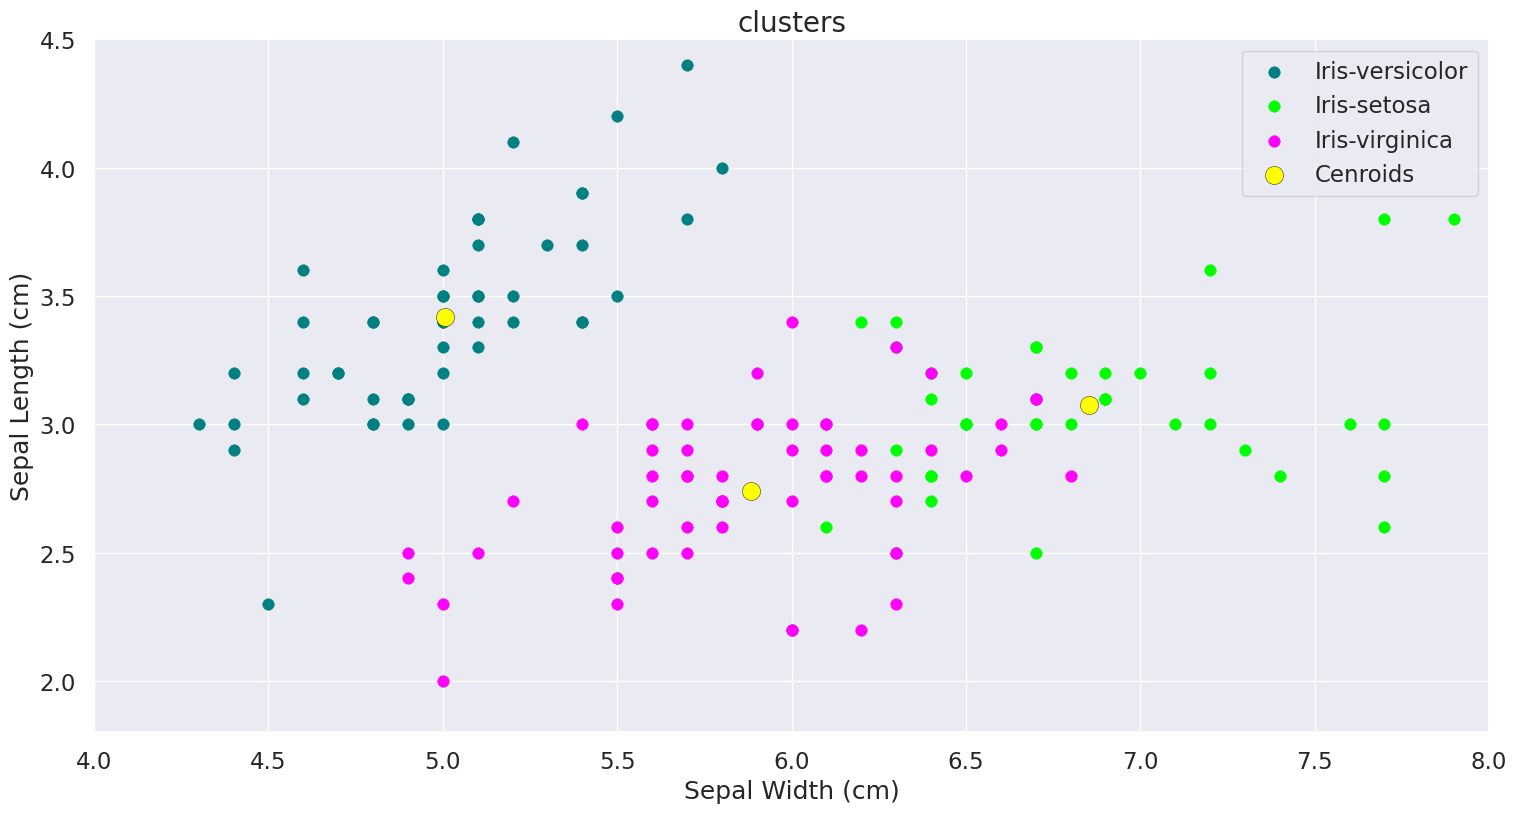

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
plt.scatter(x=clusters[clusters["cluster_Prediction"] == 0]["SepalLengthCm"],
            y=clusters[clusters["cluster_Prediction"] == 0] ["SepalWidthCm"],
            s=70, edgecolor='teal', linewidth=0.3, c='teal', label="Iris-versicolor")

plt.scatter(x=clusters[clusters["cluster_Prediction"] == 1]["SepalLengthCm"],
            y=clusters[clusters["cluster_Prediction"] == 1] ["SepalWidthCm"],
            s=70, edgecolor='lime', linewidth=0.3, c='lime', label="Iris-setosa")

plt.scatter(x=clusters[clusters["cluster_Prediction"] == 2]["SepalLengthCm"],
            y=clusters[clusters["cluster_Prediction"] == 2] ["SepalWidthCm"],
            s=70, edgecolor='magenta', linewidth=0.3, c='magenta', label="Iris-virginica")

plt.scatter(x=kms.cluster_centers_[:, 0],
            y=kms.cluster_centers_[:, 1],
            s=170,
            c='yellow',
            label='Cenroids',
            edgecolor='black',
            linewidth=0.3)

plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_xlabel("Sepal Width (cm)")
ax.set_ylabel("Sepal Length (cm)")
ax.set_title("clusters", fontsize =20)
plt.show()

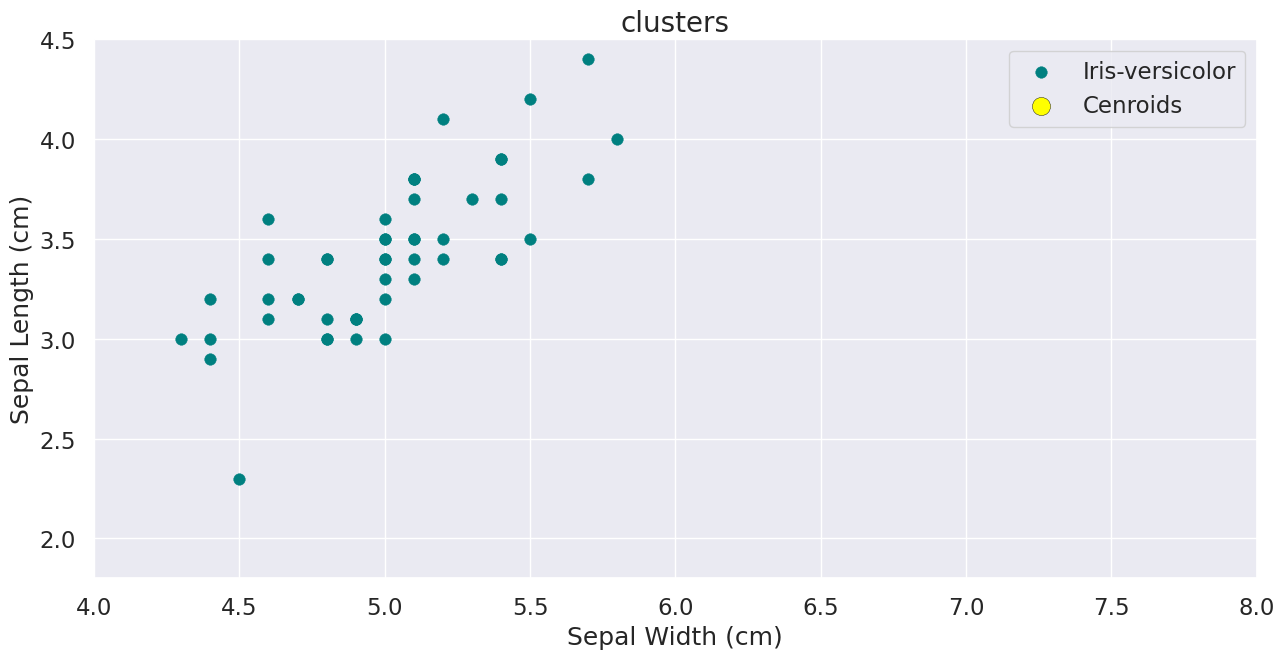

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters["cluster_Prediction"] == 0]["SepalLengthCm"],
            y=clusters[clusters["cluster_Prediction"] == 0] ["SepalWidthCm"],
            s=70, edgecolor='teal', linewidth=0.3, c='teal', label="Iris-versicolor")

plt.scatter(x=kms.cluster_centers_[:, 0],
            y=kms.cluster_centers_[:, 0],
            s=170,
            c='yellow',
            label='Cenroids',
            edgecolor='black',
            linewidth=0.3)

plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_xlabel("Sepal Width (cm)")
ax.set_ylabel("Sepal Length (cm)")
ax.set_title("clusters", fontsize =20)
plt.show()